### Här importerar vi dataset CSV
##### Ålder, kön, längd, vikt, blodtryck, kolesterol, rökare och diabetes.

In [11]:
%pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression


Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.read_csv('health_study_dataset.csv', encoding='utf-8')

df.head()

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


#### Här räknar vi ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.

In [13]:
# Fix column names and DataFrame creation
kolumner = ["age", "weight", "height", "systolic_bp", "cholesterol"]
stats_df = pd.DataFrame(columns=["mean", "median", "min", "max"], index=kolumner)

for col in kolumner:
    col_vals = df[col].dropna()
    stats_df.loc[col] = [np.mean(col_vals), np.median(col_vals), np.min(col_vals), np.max(col_vals)]

stats_df
stats_df.to_csv("statistics_health.csv")
print("statistics_health.csv")

statistics_health.csv


#### Minst tre grafer " Histogram, stapeldiagram och boxplot"

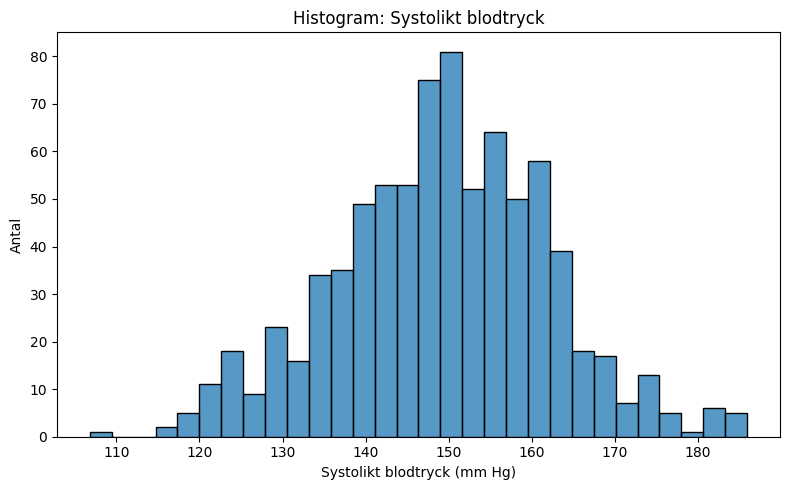

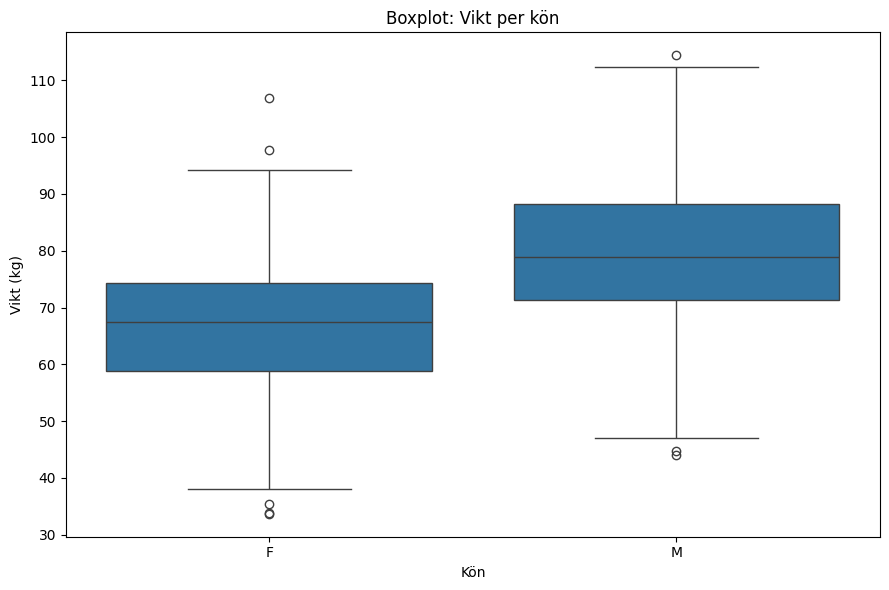

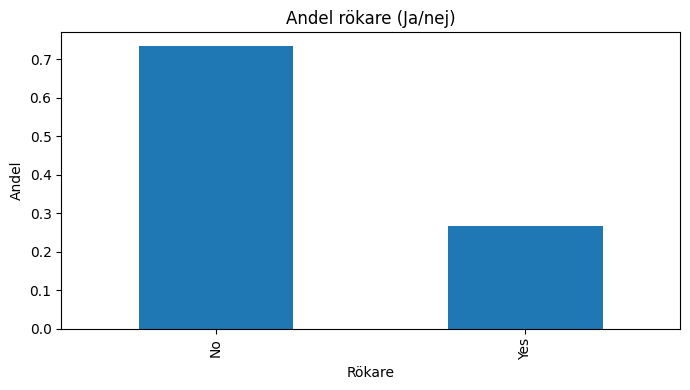

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["systolic_bp"].dropna(), kde=False, bins=30)
plt.title("Histogram: Systolikt blodtryck")
plt.xlabel("Systolikt blodtryck (mm Hg)")
plt.ylabel("Antal")
plt.tight_layout()
plt.savefig("Histogram_systolic_bp.png")
plt.show()

plt.figure(figsize=(9,6))
sns.boxplot(x="sex", y="weight", data=df)
plt.title("Boxplot: Vikt per kön")
plt.xlabel("Kön")
plt.ylabel("Vikt (kg)")
plt.tight_layout()
plt.savefig("Boxplot_vikt_per_kon.png")
plt.show()

rokar_grupp = df["smoker"].value_counts(dropna=False)
plt.figure(figsize=(7,4))
(rokar_grupp / rokar_grupp.sum()).plot(kind="bar")
plt.title("Andel rökare (Ja/nej)")
plt.xlabel("Rökare")
plt.ylabel("Andel")
plt.tight_layout()
plt.savefig("Andel_rokare.png")
plt.show()


#### Andel personer med sjukdom

In [15]:
sjuckdom_grupp = df["disease"].mean()
print(f"Andel med sjukdom:{sjuckdom_grupp:3f}")

np .random.seed(42)
simulerad = np.random.binomial(n=1, p=sjuckdom_grupp, size=1000)
andel_simulerad =np.mean(simulerad)
print(f"andel med sjukdom i simulerad data: {andel_simulerad:3f}")

differens = sjuckdom_grupp - andel_simulerad
print(f"Skillnaden i andel med sjukdom mellan verklig och simulerad data: {differens:3f}")



Andel med sjukdom:0.058750
andel med sjukdom i simulerad data: 0.056000
Skillnaden i andel med sjukdom mellan verklig och simulerad data: 0.002750
